# Figure 2

In [53]:
%load_ext autoreload
%autoreload 2

# Imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src import constants as C
import src.visualisation as vis
from src.visualisation import maps_plots
from src.visualisation import oe_plots
from src.visualisation import z_loeuf_plots
from src.visualisation import z_dist_plots


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
# Styles and colours
plt.style.use(C.STYLE_DEFAULT)
default_palette = vis.color_palette()
regions_palette = vis.color_palette("regions")
maps_palette = vis.color_palette("maps")

In [55]:
# Get upset plot image file
upset = plt.imread("data/plots/fig_2_upset_plot.png")

In [56]:
# Read data
maps = pd.read_csv(C.STATS_MAPS, sep="\t")

synonymous_oe = pd.read_csv(C.STATS_OE, sep="\t").query("csq == 'synonymous_variant'")
nonsense_oe = pd.read_csv(C.STATS_OE, sep="\t").query("csq == 'stop_gained'")

z_loeuf = pd.read_csv(C.STATS_Z_LOEUF, sep="\t")

z_transcript = pd.read_csv(C.STATS_Z_REGIONS, sep="\t").query("region == 'transcript'")
z_nmd_target = pd.read_csv(C.STATS_Z_REGIONS, sep="\t").query("region == 'nmd_target'")
z_start_proximal = pd.read_csv(C.STATS_Z_REGIONS, sep="\t").query("region == 'start_proximal'")
z_long_exon = pd.read_csv(C.STATS_Z_REGIONS, sep="\t").query("region == 'long_exon'")
z_distal = pd.read_csv(C.STATS_Z_REGIONS, sep="\t").query("region == 'distal'")

## Figure construction

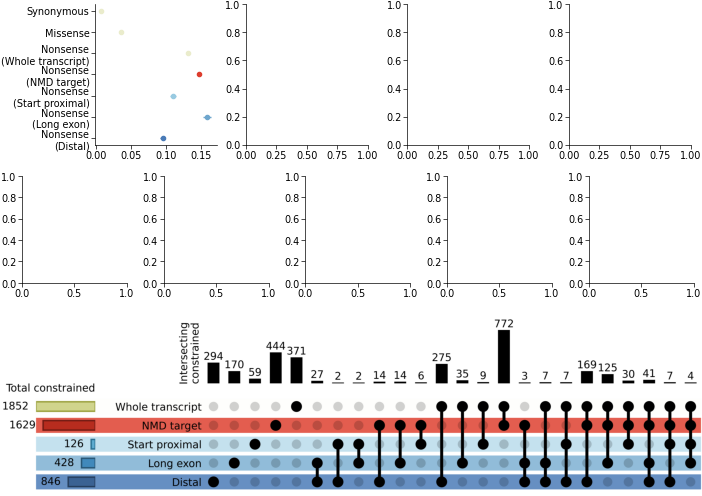

In [59]:
# Instantiate the figure
fig = plt.figure(figsize=(18 * C.CM, 13 * C.CM), layout=("constrained"))

# A subfigure is needed for the upset plot image
subfigs = fig.subfigures(3, 1, height_ratios=[5,4,6])

# Define the Axes
axs_top = subfigs[0].subplots(1, 4)
axs_middle = subfigs[1].subplots(1, 5)
ax_bottom = subfigs[2].subplots(1, 1)

ax_maps = axs_top[0]
ax_oe_syn = axs_top[1]
ax_oe_non = axs_top[2]
ax_z_loeuf = axs_top[3]

ax_z_transcript = axs_middle[0]
ax_z_nmd = axs_middle[1]
ax_z_long = axs_middle[2]
ax_z_distal = axs_middle[3]
ax_z_start = axs_middle[4]

# Plots

## Upset plot image
ax_bottom.imshow(upset)
ax_bottom.axis("off")

## MAPS plot
for i, row in maps.iterrows():
    maps_plots.plot_maps(ax = ax_maps, y=row["csq"], x=row["maps"], xerr=row["ci95"], color=maps_palette[i])

# plot_maps(maps, ax_maps)
# plot_z_loeuf(z_loeuf, ax_z_loeuf)
# plot_oe(oe, ax_oe_syn, csq="synonymous", ylabel="Observed")
# plot_oe(oe, ax_oe_non, csq="nonsense")
# plot_z_dist(z_dist, ax_z_nmd, region="nmd_target", title="NMD target", FDR_label=True)
# plot_z_dist(z_dist, ax_z_long, region="long_exon", title="Long exon")
# plot_z_dist(z_dist, ax_z_distal, region="distal_nmd", title="Distal")
# plot_z_dist(
#     z_dist,
#     ax_z_start,
#     region="start_proximal",
#     title="Start-proximal",
#     FDR_line=False,
#     FDR_label=False,
# )

# # Panel labels
# Axes = [ax_maps, ax_oe_syn, ax_z_loeuf, ax_z_nmd, ax_bottom]
# labels = list("ABCDE")
# x_pos = [-0.05] * 4 + [0]
# y_pos = [1.05] * 4 + [0.95]

# for a, l, x, y in zip(Axes, labels, x_pos, y_pos):
#     panel_label(a, l, x, y)

# # Save figure
# plt.savefig("../plots/figure_02.svg", format="svg")
# plt.savefig("../plots/figure_02.png", format="png", dpi=1000)